In [1]:
# question about assignment question 5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [4]:
# assingment 
#1.Determine all the variable types and find the fraction of the missing values for each variable.
#2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations 
#   as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which 
#   variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
#3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using
#   a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for 
#   a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
#4.This time, fill in the missing values using interpolation (extrapolation).
#5.Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [5]:
useducation[1:50]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986
10,1992_GEORGIA,GEORGIA,1992,NaN,5536901.0,398701.0,2798674.0,2339526.0,5535942.0,3043984.0,...,99648.0,92374.0,63646.0,787599.0,315539.0,1106441.0,215.594906,259.359434,206.844175,NaN


In [6]:
useducation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [7]:
for column_name in ["PRIMARY_KEY"]:
    print("These are the problematic values for the variable: {}".format(column_name))
    for value in useducation["PRIMARY_KEY"]:
        try:
            float(value)
        except:
            print(value)
# also check column state and year

These are the problematic values for the variable: PRIMARY_KEY
1992_ALABAMA
1992_ALASKA
1992_ARIZONA
1992_ARKANSAS
1992_CALIFORNIA
1992_COLORADO
1992_CONNECTICUT
1992_DELAWARE
1992_DISTRICT_OF_COLUMBIA
1992_FLORIDA
1992_GEORGIA
1992_HAWAII
1992_IDAHO
1992_ILLINOIS
1992_INDIANA
1992_IOWA
1992_KANSAS
1992_KENTUCKY
1992_LOUISIANA
1992_MAINE
1992_MARYLAND
1992_MASSACHUSETTS
1992_MICHIGAN
1992_MINNESOTA
1992_MISSISSIPPI
1992_MISSOURI
1992_MONTANA
1992_NEBRASKA
1992_NEVADA
1992_NEW_HAMPSHIRE
1992_NEW_JERSEY
1992_NEW_MEXICO
1992_NEW_YORK
1992_NORTH_CAROLINA
1992_NORTH_DAKOTA
1992_OHIO
2001_WYOMING
1992_OKLAHOMA
1992_OREGON
1992_PENNSYLVANIA
1992_RHODE_ISLAND
1992_SOUTH_CAROLINA
1992_SOUTH_DAKOTA
1992_TENNESSEE
1992_TEXAS
1992_UTAH
1992_VERMONT
1992_VIRGINIA
1992_WASHINGTON
1992_WEST_VIRGINIA
1992_WISCONSIN
1992_WYOMING
1993_ALABAMA
1993_ALASKA
1993_ARIZONA
1993_ARKANSAS
1993_CALIFORNIA
1993_COLORADO
1993_CONNECTICUT
1993_DELAWARE
1993_DISTRICT_OF_COLUMBIA
1993_FLORIDA
1993_GEORGIA
1993_HAWAII

In [8]:
useducation.isnull().sum()*100/useducation.isnull().count() # question about .count()
# when apply sum() only count true value, but count() count all values

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [9]:
#useducation.isnull()

In [10]:
useducation = useducation.drop(columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])

In [11]:
useducation.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,1.280000e+03,1319.000000,1360.000000,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,9.027693e+05,17601.614102,63746.761029,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,1.327562e+06,30016.166447,80205.138143,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,1.815645e+05,2021.000000,11745.000000,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,5.102595e+05,8106.000000,41597.500000,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,9.668515e+05,22295.000000,73865.250000,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,530531.000000,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06


In [12]:
#Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations 
#   as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which 
#   variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

To answer the second question, I need to look into the missing value percentage result above.
from column "ENROLL" to column "CAPITAL_OUTLAY_EXPENDITURE", all the columns between these two columns 
(including these two columns), they are all numeric column, and type is float, so I think it's better 
to use mean/median value as the fill-in values to those columns.
And for columns between GRADES_PK_G and GRADES_ALL_G, should be fill the missing value with median value of each column

For column AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE, the percentages of missing value of these columns are pretty high, the missing value percentages ranging between 64% to 67%, and these columns are continuous numeric values, under these two conditions, it's better to remove all these last 4 columns in the dataset. fill in any values to these 4 columns will drastically alter the pattern of the dataset. So remove the last 4 columns.


In [13]:
#this is the answer to question 2 when using overall mean
column_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE',
              'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
for column_name in column_list:
    #useducation[column_name].fillna(useducation[column_name].mean(),inplace=False)
    useducation.loc[:, column_name] = useducation.loc[:, column_name].fillna(useducation.loc[:, column_name].mean())
    

In [14]:
useducation.isnull().sum()*100/useducation.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
dtype: float64

In [15]:
#  Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using
#   a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for 
#   a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

After taking year column into consideration of the data, fill in the missing of columns, one more thing should be cautioned, that caculate mean/median of each year, not whole column. 

In [16]:
useducation['ENROLL'].groupby(useducation['YEAR']).mean()

YEAR
1992    915930.820993
1993    812221.876874
1994    811611.359017
1995    864058.555446
1996    878351.682912
1997    891279.858350
1998    899732.374947
1999    906569.857084
2000    911190.314711
2001    916246.721491
2002    922748.721491
2003    931028.585897
2004    935290.331660
2005    938689.907931
2006    942855.501152
2007    944610.484202
2008    940694.510254
2009    927365.453338
2010    927683.791827
2011    942887.771499
2012    941825.254258
2013    943260.978396
2014    945689.966160
2015    947544.226771
2016    952388.764706
2017    915930.820993
Name: ENROLL, dtype: float64

In [17]:
useducation['YEAR'].max()

2017

In [18]:
#reload the whole data for answering question 3 (using mean for each specifc year) 
#??? question about why the results are not 0% of this method

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation2 = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()



In [19]:
useducation2.isnull().sum()*100/useducation2.isnull().count()



PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [20]:
useducation2=useducation2.drop(columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])

In [21]:
#useducation["ENROLL"] = useducation.groupby("YEAR").transform(lambda x: x.fillna(x.mean()))
# question about this line, referenced on stackoverflow
# for loop
#answer to question 3
column_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE',
              'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
    
#for col in fill_list:
    #for year in years:
        #education3_df.loc[education3_df["YEAR"] == year, col] = education3_df.loc[education3_df["YEAR"] == year, col].fillna(education3_df[education3_df["YEAR"] == year][col].mean())
    
# slack answer
for col in column_list:
    for year in useducation2['YEAR'].unique():
        useducation2.loc[useducation2['YEAR'] == year,col] = useducation2.loc[useducation2['YEAR'] == year,col].fillna(useducation2[useducation2['YEAR'] == year][col].mean())

In [22]:
useducation2.isnull().sum()*100/useducation2.isnull().count() # why the results are not 0%???

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          7.171582
TOTAL_REVENUE                   3.418231
FEDERAL_REVENUE                 3.418231
STATE_REVENUE                   3.418231
LOCAL_REVENUE                   3.418231
TOTAL_EXPENDITURE               3.418231
INSTRUCTION_EXPENDITURE         3.418231
SUPPORT_SERVICES_EXPENDITURE    3.418231
OTHER_EXPENDITURE               7.171582
CAPITAL_OUTLAY_EXPENDITURE      3.418231
GRADES_PK_G                     6.836461
GRADES_KG_G                     6.836461
GRADES_4_G                      6.836461
GRADES_8_G                      6.836461
GRADES_12_G                     6.836461
GRADES_1_8_G                    6.836461
GRADES_9_12_G                   6.836461
GRADES_ALL_G                    6.836461
dtype: float64

In [23]:
#reload whole data for question 4 

In [24]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation3 = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [25]:
useducation3.isnull().sum()*100/useducation3.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [26]:
useducation3.drop(columns=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'])

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,364760.0,7410.0,47588.0,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,NaN,48542.0,5731.0,41319.0,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,NaN,30595.0,463.0,8025.0,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,NaN,47272.0,4818.0,6667.0,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,NaN,1667826.0,31464.0,161701.0,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0


In [27]:
useducation3 = useducation3.interpolate(method='linear',limit_direction='backward')

In [28]:
useducation3.isnull().sum()*100/useducation3.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          13.806971
TOTAL_REVENUE                   13.806971
FEDERAL_REVENUE                 13.806971
STATE_REVENUE                   13.806971
LOCAL_REVENUE                   13.806971
TOTAL_EXPENDITURE               13.806971
INSTRUCTION_EXPENDITURE         13.806971
SUPPORT_SERVICES_EXPENDITURE    13.806971
OTHER_EXPENDITURE               13.806971
CAPITAL_OUTLAY_EXPENDITURE      13.806971
GRADES_PK_G                      3.083110
GRADES_KG_G                      3.016086
GRADES_4_G                       3.016086
GRADES_8_G                       3.016086
GRADES_12_G                      3.016086
GRADES_1_8_G                     3.016086
GRADES_9_12_G                    3.016086
GRADES_ALL_G                     3.083110
AVG_MATH_4_SCORE                 0.000000
AVG_MATH_8_SCORE                 0.000000
AVG_READING_4_SCORE              0

In [29]:
useducation3 = useducation3.interpolate(method='linear',limit_direction='forward')

In [30]:
useducation3.isnull().sum()*100/useducation3.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

In [31]:
column_list = ['ENROLL','TOTAL_REVENUE','FEDERAL_REVENUE','STATE_REVENUE','LOCAL_REVENUE','TOTAL_EXPENDITURE','INSTRUCTION_EXPENDITURE','SUPPORT_SERVICES_EXPENDITURE','OTHER_EXPENDITURE','CAPITAL_OUTLAY_EXPENDITURE',
              'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']
for col in column_list:
    print(pd.concat([useducation[col],useducation2[col],useducation3[col]],axis=1).describe())

             ENROLL        ENROLL        ENROLL
count  1.492000e+03  1.385000e+03  1.492000e+03
mean   9.159308e+05  9.161654e+05  9.838759e+05
std    9.667725e+05  1.003532e+06  1.006773e+06
min    4.386600e+04  4.386600e+04  4.386600e+04
25%    3.150940e+05  2.867590e+05  2.821195e+05
50%    8.204140e+05  7.374010e+05  7.373935e+05
75%    9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.084108e+06   1.111164e+07
std     1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05
25%     2.546261e+06   2.425600e+06   2.546261e+06
50%     6.359310e+06   5.778507e+06   6.351760e+06
75%     9.276958e+06   1.116863e+07   1.803650e+07
max     8.921726e+07   8.921726e+07   8.921726e+07
       FEDERAL_REVENUE  FEDERAL_REVENUE  FEDERAL_REVENUE
count     1.492000e+03     1.441000e+03     1.492000

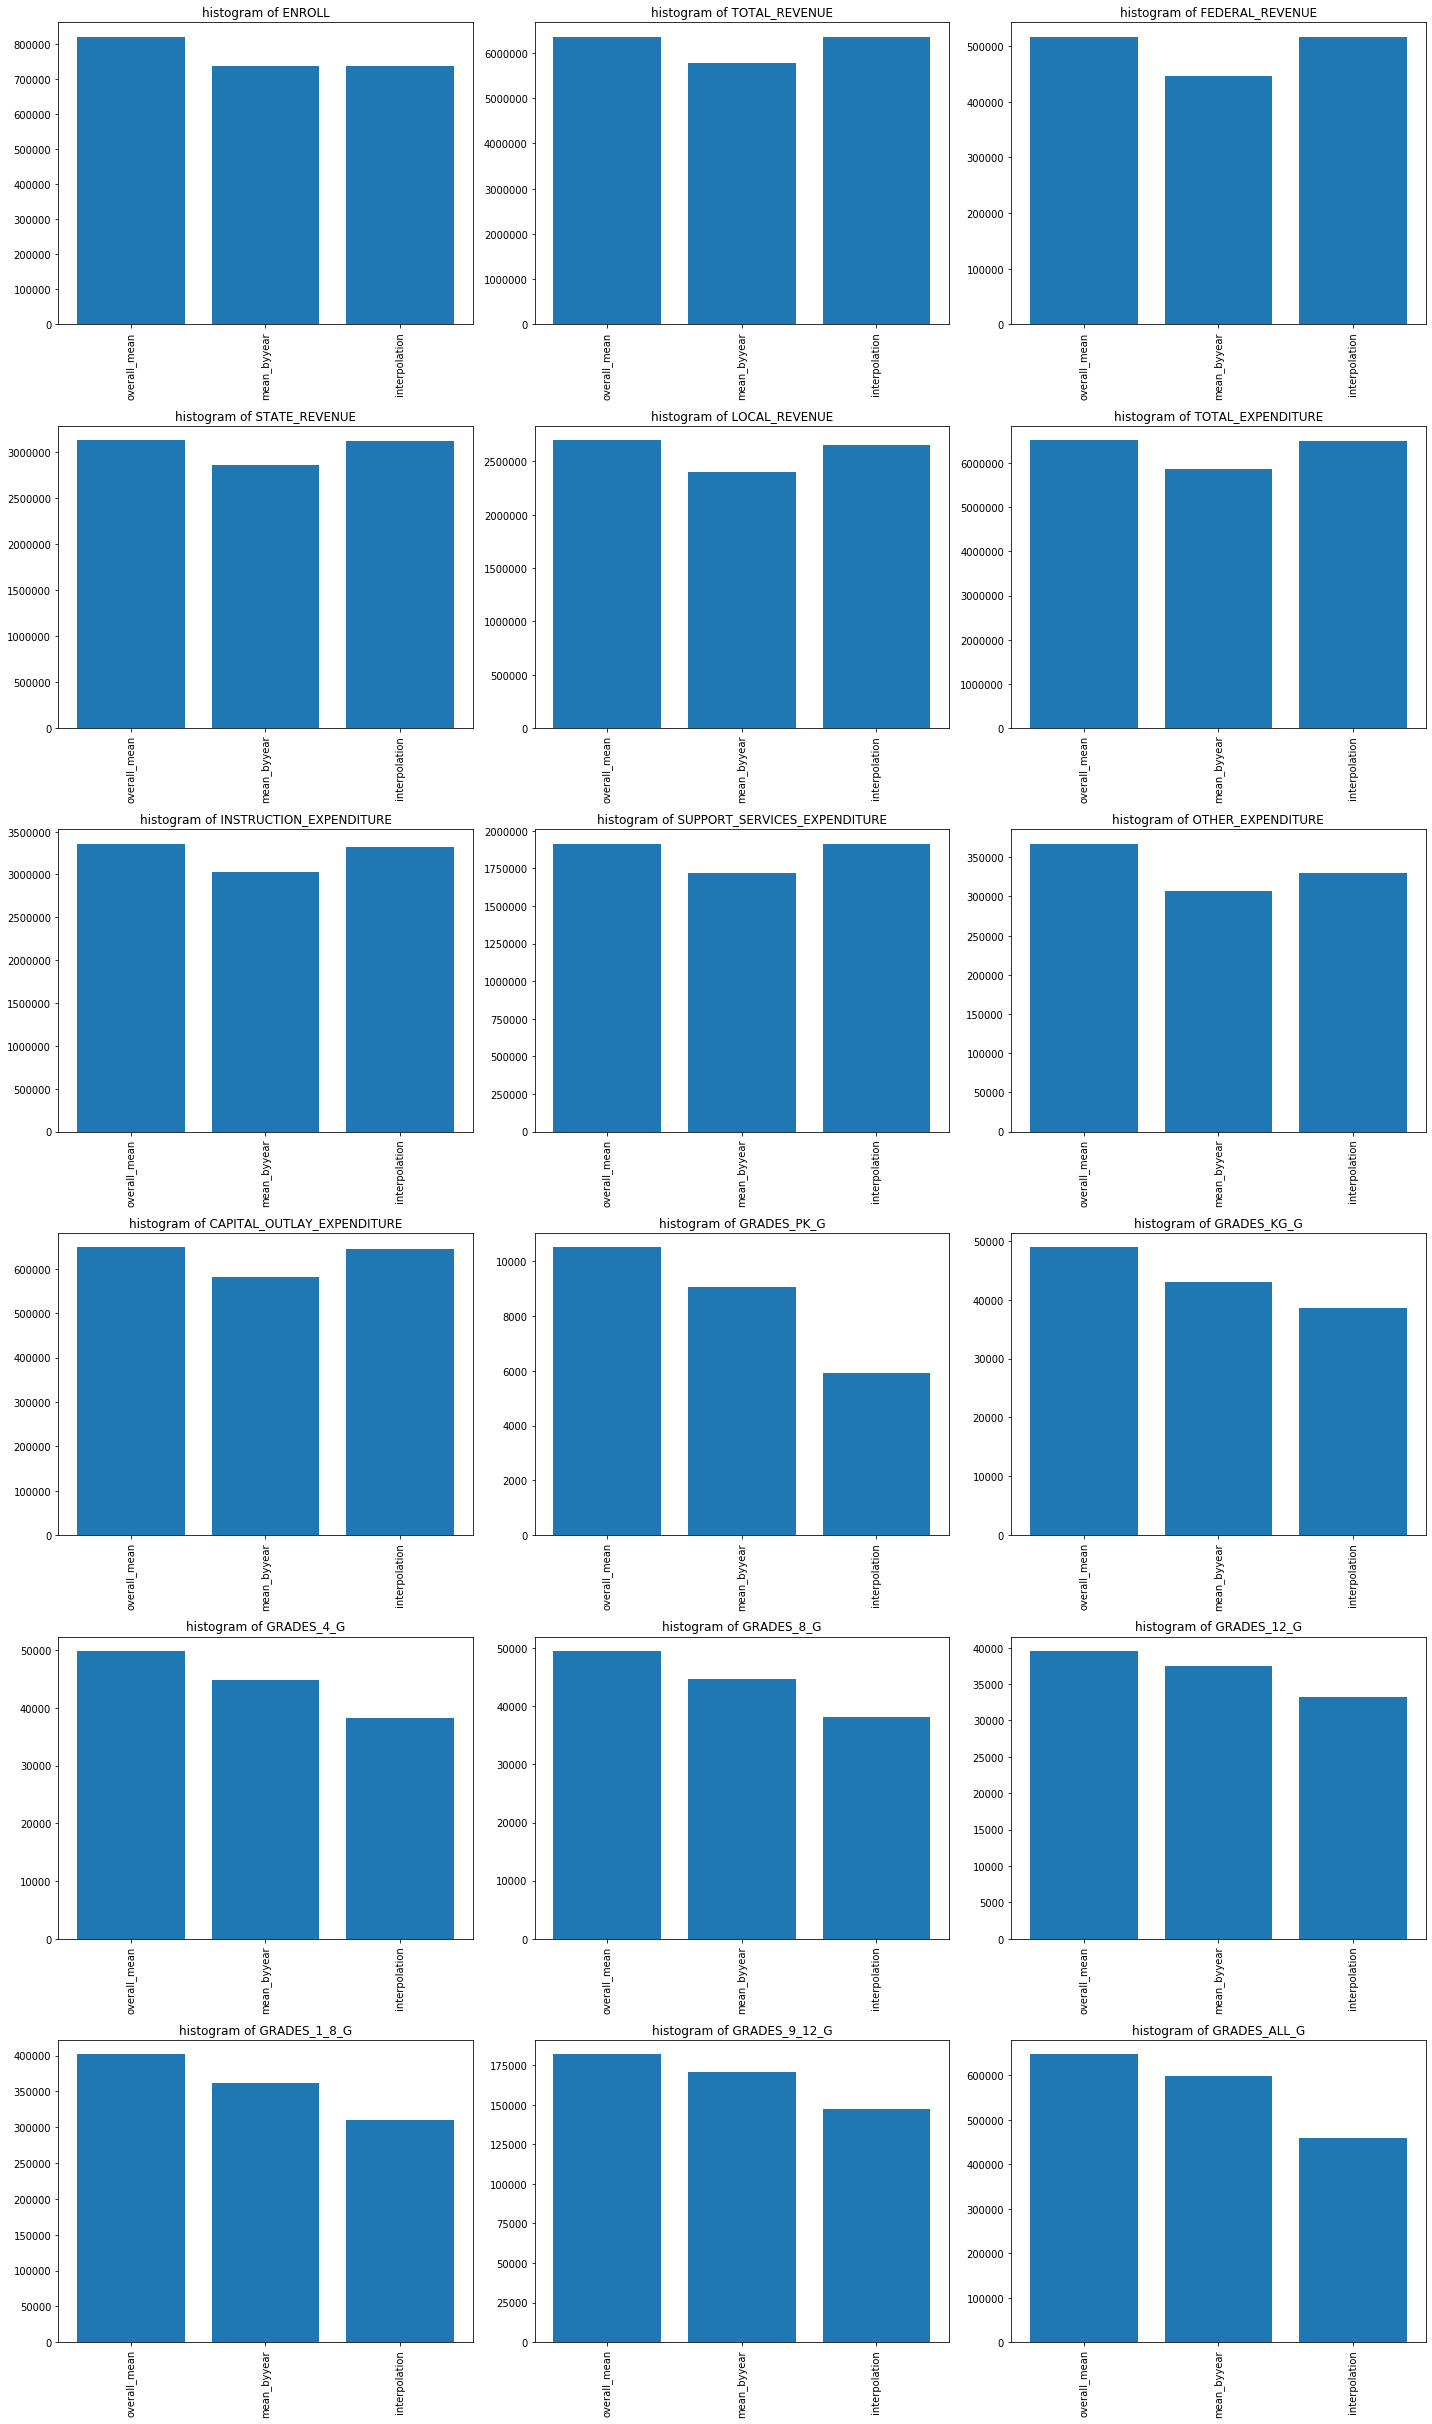

In [33]:
# plot the comparison
fig = plt.figure(figsize=(20,100))
for i, col in enumerate(column_list):
    combined_list=pd.concat([useducation[col], useducation2[col], useducation3[col]], axis=1)
    plt.subplot(len(column_list),3,i+1)
    plt.bar(['overall_mean','mean_byyear','interpolation'],combined_list.median())# ??? what is this median() meaning here?
    plt.xticks(rotation='vertical')
    plt.title('histogram of {}'.format(col))

plt.tight_layout()
plt.show()
    
    
    
